# **Read and convert image data**

This code reads the before and after images as well as their labels and then processes it.

## Setup environment

In [11]:
import numpy as np
import skimage as ski
from skimage import io
import pandas as pd
import matplotlib.pyplot as plt
import os

In [12]:
workDir = os.getcwd()
db = 'database/'

print(db)

database/


### Reader function

In [13]:
def readImage(path):
    img = io.imread(path,False)
    return img

def readImages(paths):
    imgs = io.imread_collection(paths)
    return imgs

['database/hurricane-florence_00000000_post_disaster.png', 'database/hurricane-florence_00000001_post_disaster.png', 'database/hurricane-florence_00000002_post_disaster.png', 'database/hurricane-florence_00000003_post_disaster.png', 'database/hurricane-florence_00000008_post_disaster.png', 'database/hurricane-florence_00000012_post_disaster.png', 'database/hurricane-florence_00000015_post_disaster.png', 'database/hurricane-florence_00000016_post_disaster.png', 'database/hurricane-florence_00000018_post_disaster.png', 'database/hurricane-florence_00000020_post_disaster.png', 'database/hurricane-florence_00000022_post_disaster.png', 'database/hurricane-florence_00000023_post_disaster.png', 'database/hurricane-florence_00000024_post_disaster.png', 'database/hurricane-florence_00000026_post_disaster.png', 'database/hurricane-florence_00000027_post_disaster.png', 'database/hurricane-florence_00000028_post_disaster.png', 'database/hurricane-florence_00000030_post_disaster.png']
17


Text(0.5, 1.0, 'Post-disaster')

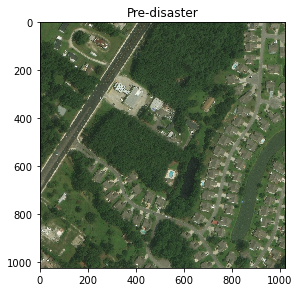

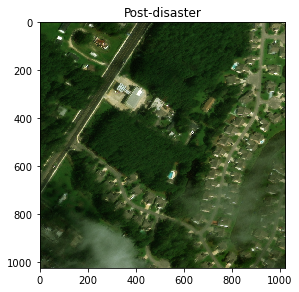

In [27]:
imgIDlist = pd.read_csv(db+'idList.csv')
# print(imgIDlist)
nWidth = 8 # width of ID in file name

imgName_pre = [db + hur + '_' + str(id).rjust(nWidth,'0') + '_pre_disaster.png' 
    for hur, id in zip(imgIDlist.Disaster, imgIDlist.ID)]

imgName_post = [db + hur + '_' + str(id).rjust(nWidth,'0') + '_post_disaster.png' 
    for hur, id in zip(imgIDlist.Disaster, imgIDlist.ID)]

# print(imgName_pre)
print(imgName_post)

img_pre = readImages(imgName_pre)
img_post = readImages(imgName_post)
print(len(img_pre))

# plot samples
plt.figure()
io.imshow(img_pre[0])
plt.title('Pre-disaster')

plt.figure()
io.imshow(img_post[0])
plt.title('Post-disaster')

# # show all at once
# io.imshow_collection(img_pre) 

### Read labels

In [51]:
def readLabelFile(file_post):
    # TO DO (Aaron): code to read all polygons representing a building footprint and 
    #       damage state for each from the .json files. Look for packages that could 
    #       handle .json file type before attempting to do it manually.

    # initialize 'buildings' variable to number of buildings in this image
    # loop through lng_lat
        # extract feature_type, sub_type, and wkt(polygon) into a list or pandas 
    import json
    import geojson
    import geopandas as gpd
    ################################## method 1
    # load data using Python JSON module
    with open(file_post,'r') as f:
        data = json.loads(f.read())
    # Normalizing data
    bldgs_from_one_file= pd.json_normalize(data, record_path =['lng_lat'])
    ################################## method2
    #with open(file_post) as f:
        #gj = geojson.load(f)
    #bldgs_from_one_file = gj['features'][0]
    ################################## method3
    #bldgs_from_one_file = gpd.read_file(file_post)
    ################################## method4
    #with open(file_post) as f:
        #data = json.load(f)
    #for features in data['features']:
        #bldgs_from_one_file.append(features['properties'])
    ################################## method5
    #bldgs_from_one_file = pd.read_json(file_post)
    
    # return feature_type, sub_type, wkt
    
    return bldgs_from_one_file

In [52]:
# TO DO (Aaron): Loop through all images and call readLabelFile() to extract 
#               polygons and labels. Start with this format and modify it if necessary.

# create the list text file names from imgId list csv
txtName_pre = [db + hur + '_' + str(id).rjust(nWidth,'0') + '_pre_disaster.json' 
    for hur, id in zip(imgIDlist.Disaster, imgIDlist.ID)]
txtName_post = [db + hur + '_' + str(id).rjust(nWidth,'0') + '_post_disaster.json' 
    for hur, id in zip(imgIDlist.Disaster, imgIDlist.ID)]

# buildings, damageStates = [readLabelFile(pre, post)
#     for pre, post in zip(txtName_pre, txtName_post)]
all_buildings = []

for i in enumerate(txtName_post): # loop through all .json files
    
    bldgs_from_one_file = readLabelFile(txtName_post[i])
    all_buildings.append(bldgs_from_one_file)


TypeError: list indices must be integers or slices, not tuple

### Verification of polygons and damage indicators

In [72]:
# TO DO (Aaron): plot overlay of polygons on images to verify correctness of extraction.
# another text


### Breakdown the image based on the polygons

In [71]:
def extractBuilding(image, polygon):
    # TO DO (Abiy): code to extract area of the given image based on a given polygon. 
    bldgImg = 0

    return bldgImg

In [ ]:
# TO DO (Abiy): Loop through all images and individual buildings and call extractBuilding() to extract 
# individual buildings

### Verification of extracted buildings

In [ ]:
# TO DO (Abiy): plot extracted individual buildings (pre- and post-disaster) to verify
#               the correctness.